In [1]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/Lya_commands')

from Ltif import Lpicday, Lpic
from sklearn import datasets, metrics, svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import dump, load

In [3]:
df = Lpicday('23_12_07').clusters_day(min_size = 80)
cl = [val for bal in list(df['cluster']) for val in bal if len(val) > 0]

100%|██████████| 205/205 [00:22<00:00,  9.18it/s]


In [12]:
len(cl)

715

In [ ]:
rows, cols = 36, 20

_, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (50,120))


for i in range(rows):
    for ax, image, label in zip(axes[i], cl[cols * i:], list(range(0,len(cl)))[cols * i:]):
        ax.set_axis_off()
        ax.imshow(image, interpolation = 'nearest')
        ax.set_title('Cluster index: %i' % label)

In [4]:
target = np.array([1,1,1,1,1,1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,2,3,2,
                  1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2,1,1,1,
                  1,1,1,4,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,2,1,1,2,1,1,2,1,1,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,2,2,1,
                  1,1,1,2,2,1,1,1,1,1,2,1,2,1,1,2,1,1,1,1,1,1,1,1,2,2,2,1,1,1,2,1,2,1,2,1,1,1,1,2,
                  2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,2,1,1,2,1,1,2,1,1,1,1,1,2,2,1,
                  1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2,2,1,1,3,1,2,
                  1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,
                  1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,2,1,1,1,1,
                  1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,3,2,1,1,1,1,1,1,1,1,1,1,
                  1,1,2,1,1,1,1,1,2,3,1,1,1,1,1,1,2,1,1,2,1,2,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,
                  1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,
                  1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,3,2,1,1,1,1,
                  1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,])

target = [val if val < 3 else 2 for val in target]

In [5]:
cl = [val for bal in list(df['cluster']) for val in bal if len(val) > 0]

max_h, max_w = 53, 42

for item in [val for bal in cl for val in bal]:
    while len(item) < max_w:
        item += [0]

for item in cl:
    while len(item) < max_h:
        item += [[0] * max_w]
        
ac = np.array(cl)

data = ac.reshape(len(cl), -1)

In [17]:
clf = load('/eos/user/l/lkoller/ML models/clust_num_v5.txt')

In [9]:
predicted = clf.predict(data)

In [12]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(target, predicted)}\n"
)

Classification report for classifier SVC(probability=True):
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       606
           2       0.98      0.83      0.90       109

    accuracy                           0.97       715
   macro avg       0.97      0.92      0.94       715
weighted avg       0.97      0.97      0.97       715




In [18]:
clf.score(data,target)

0.972027972027972

In [81]:
clf.predict_proba([data[ind[17]]])


array([[1.01605281e-05, 9.99989839e-01]])

In [14]:
ind = [val[0] for val in list(enumerate(predicted == target)) if val[1] == False]
len(ind)
#for i in ind:
#    plt.figure(figsize = (10,10))
#    plt.imshow(cl[i])
#    plt.title('predicted %i' % predicted[i])

20

predicted 1
actual 2
[-0.82296841]


297

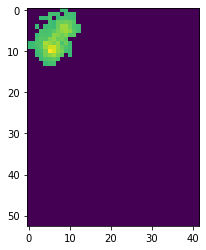

In [101]:
i = ind[17]

print('predicted %i' % predicted[i])
print('actual %i' % target[i])
print(clf.decision_function([data[i]]))
plt.imshow(cl[i])

ind[15]

In [102]:
target[307]

1

In [88]:
clf.decision_function(data)

array([-1.27389403, -0.8371217 , -1.31266353, -1.18027847, -1.25240342,
       -0.94820927, -0.93540775,  1.08787886, -1.02317502, -1.26585387,
       -1.46803454, -1.22490814, -1.09378148,  1.0158444 , -1.20954386,
       -1.27975946, -1.29670861, -1.20542863, -1.16268575, -1.26054814,
       -1.28658723, -1.1714736 , -1.24210911, -1.07295006, -1.22045253,
       -1.18649574, -1.27500001, -1.37659779,  0.60235748, -1.13432924,
       -1.24973301, -1.32017958,  0.94861693, -1.14140077, -1.44876154,
       -1.36335108, -1.11591004,  1.15650581,  1.44138622,  1.76630314,
       -0.81905751,  1.36626681, -1.32782625,  1.10933691, -1.35832416,
       -0.97057292, -1.3344266 , -1.20730395, -1.03525965, -0.49556301,
       -1.2430175 , -1.21356175, -0.8532254 , -1.45725992, -1.47230467,
       -0.88325078, -0.49638132, -0.55368931, -1.21806248, -1.19452365,
       -1.33296672, -1.203386  , -1.1102212 , -1.03089752, -1.10546176,
       -0.46165532, -1.50752627,  1.39713143, -1.20864426, -1.10